# <font color=4CBB17>**PROYECTO KAGGLE**</font>

<font color=FF7F50><h3><b>Estudiante:</b></font> Mateo Toro López</h3>
<font color=FF7F50><h3><b>Programa:</b></font> Ingeniería Industrial</h3>


### <font color=1E90FF>**Descripción**</font>

Las **Pruebas Saber Pro** son exámenes estandarizados que se administran en Colombia para evaluar la calidad y el nivel de conocimiento y competencias de los estudiantes de educación superior, es decir, de instituciones de educación superior como universidades y tecnológicos. Estas pruebas son parte de los esfuerzos del **Gobierno de Colombia** para monitorear y mejorar la calidad de la educación superior en el país.

Estas Pruebas constan de cinco componentes genéricos: **Inglés, Lectura Crítica, Competencias Ciudadanas, Razonamiento Cuantitativo y Comunicación Escrita**.

El trabajo será crear un modelo de clasificación que, para cada estudiante, prediga qué desempeño va a tener: **bajo, medio-bajo, medio-alto o alto**.


## <font color=4CBB17>**Librerias**</font>


In [7]:
# Datos
import pandas as pd
import numpy as np
from itertools import product

## Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Modelado
from sklearn.model_selection import train_test_split



# <font color=4CBB17>**Descargar la base de datos desde Kaggle**</font>


### <font color=1E90FF>**Instrucciones**</font>

**1.** Crea un archivo kaggle.json con tu token de autenticación (en kaggle → haz clic en el ícono de usuario en la esquina superior derecha → configuración → API crear nuevo token)

**2.** Subir el archivo kaggle.json a este espacio de trabajo de Colab ⬇️

In [8]:
#Subir el archivo kaggle.json a este espacio de trabajo de Colab
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


**3.** Correr la sigiente celda ⬇️

In [9]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 89% 18.0M/20.1M [00:00<00:00, 187MB/s]
100% 20.1M/20.1M [00:00<00:00, 194MB/s]


### <font color=1E90FF>**Descomprimir e inspeccionar datos**</font>


In [10]:
!unzip udea*.zip > /dev/null

In [11]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


### <font color=1E90FF>**cargar `train.csv` con pandas**</font>


In [12]:
# Librerias para procesamiento
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")

In [13]:
# Cuantas filas y columnas tiene el dataframe
rows, columns = df.shape
print(f"Número de filas: {rows}")
print(f"Número de columnas: {columns}")

Número de filas: 692500
Número de columnas: 12


In [14]:
df.set_index('ID', inplace=True)

In [15]:
df1 = df.copy() # Se crea una copia del dataframe original

# <font color=4CBB17>**Análisis exploratorio**</font>


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692500 entries, 904256 to 933374
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   PERIODO                         692500 non-null  int64 
 1   ESTU_PRGM_ACADEMICO             692500 non-null  object
 2   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 3   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 4   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 5   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 6   FAMI_TIENEINTERNET              665871 non-null  object
 7   FAMI_EDUCACIONPADRE             669322 non-null  object
 8   FAMI_EDUCACIONMADRE             668836 non-null  object
 9   ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 10  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(1), object(10)
memory usage: 63.4+ MB


In [17]:
df['PERIODO'] = df['PERIODO'].astype('object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692500 entries, 904256 to 933374
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   PERIODO                         692500 non-null  object
 1   ESTU_PRGM_ACADEMICO             692500 non-null  object
 2   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 3   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 4   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 5   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 6   FAMI_TIENEINTERNET              665871 non-null  object
 7   FAMI_EDUCACIONPADRE             669322 non-null  object
 8   FAMI_EDUCACIONMADRE             668836 non-null  object
 9   ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 10  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: object(11)
memory usage: 63.4+ MB


In [19]:
# Primeras 5 filas del dataframe
df.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
ID,,,,,,,,,,,
904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [20]:
# Ultimas 5 filas del dataframe
df.tail()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
ID,,,,,,,,,,,
25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo
933374,20195,PSICOLOGIA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Más de 30 horas,Estrato 4,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No,alto


In [21]:
# Cantidad de nulos por columna
dfnull = df.isnull().sum(axis=0) # axis=0 me indica que sea por columnas
dfnull

,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664
ESTU_PAGOMATRICULAPROPIO,6498


In [22]:
totalfilas = len(df)
totalfilas

692500

In [23]:
# Porcentaje de nulos por cada columna
porcentaje_null = pd.DataFrame({"Porcentaje nulos":((dfnull / totalfilas) * 100)})
porcentaje_null

,Porcentaje nulos
PERIODO,0.000000
ESTU_PRGM_ACADEMICO,0.000000
ESTU_PRGM_DEPARTAMENTO,0.000000
ESTU_VALORMATRICULAUNIVERSIDAD,0.907870
ESTU_HORASSEMANATRABAJA,4.455884
FAMI_ESTRATOVIVIENDA,4.640722
FAMI_TIENEINTERNET,3.845343
FAMI_EDUCACIONPADRE,3.347004
FAMI_EDUCACIONMADRE,3.417184
ESTU_PAGOMATRICULAPROPIO,0.938339


> **Se encuentra que el porcentaje de nulos por columna no es significativo en ninguna columna**

In [24]:
duplicados = df.duplicated()
print(duplicados)

ID
904256    False
645256    False
308367    False
470353    False
989032    False
          ...  
25096     False
754213    False
504185    False
986620    False
933374    False
Length: 692500, dtype: bool


In [25]:
num_duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicados}")

Número de filas duplicadas: 63347


In [26]:
df.columns

Index(['PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')

**NÚMERO DE ESTUDIANTES EN CADA CLASE PARA CADA COLUMNA**

In [27]:
columnas1 = df.columns[1:12]
for columna in columnas1:
    df_count = pd.DataFrame({ "Conteo": df[columna].value_counts(), # Creo un nuevo dataframe con los valores unicos por columna como index, y donde mi primera columna es la frecuencia absoluta (número de veces que se repite cada valor o categoría) para cada columna
                "Proporción": df[columna].value_counts(normalize=True).mul(100).round(3).astype(str) + ' %'})   # y en una segunda columna de df_count la frecuencia relativa (proporcion de cada valor del index en la columna)
    print(df_count)
    print("---------------------------------------")

                                                    Conteo Proporción
ESTU_PRGM_ACADEMICO                                                  
DERECHO                                              53244    7.689 %
ADMINISTRACION DE EMPRESAS                           51902    7.495 %
CONTADURIA PUBLICA                                   39664    5.728 %
PSICOLOGIA                                           31932    4.611 %
INGENIERIA INDUSTRIAL                                28481    4.113 %
...                                                    ...        ...
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                      1      0.0 %
ADMINISTRACION EN NEGOCIOS INTERNACIONALES               1      0.0 %
ADMINISTRACION DE COMERCIO EXTERIOR                      1      0.0 %
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y D...       1      0.0 %
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                    1      0.0 %

[948 rows x 2 columns]
---------------------------------------
                        Co

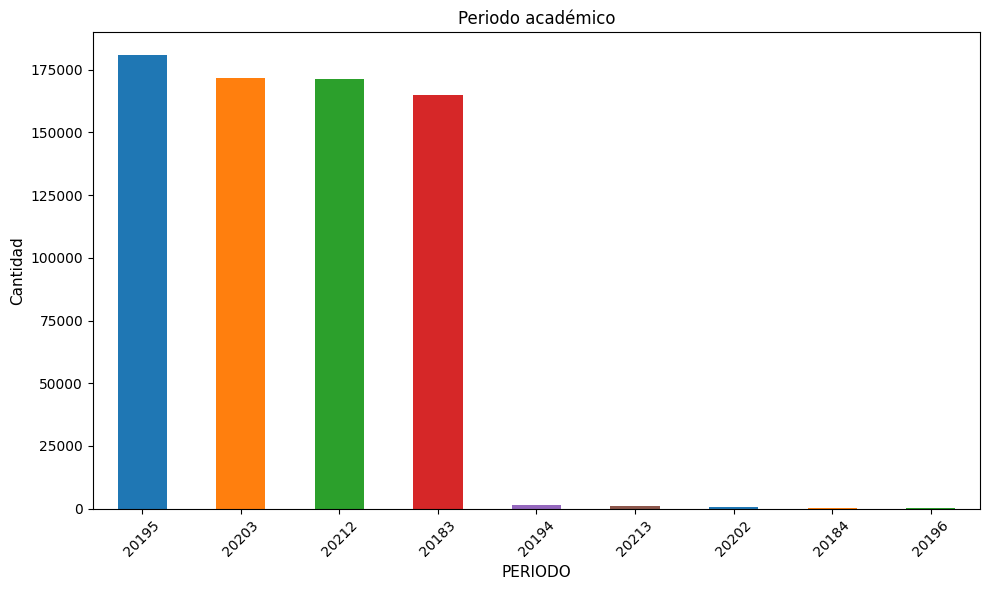

In [28]:

df_count = df['PERIODO'].value_counts()

# Crear la gráfica
plt.figure(figsize=(10, 6))
df_count.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])  # Colores personalizados

# Personalizar la gráfica
plt.title('Periodo académico', fontsize=12)  # Tamaño de título reducido
plt.xlabel('PERIODO', fontsize=11)
plt.ylabel('Cantidad', fontsize=11)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [29]:
df.columns

Index(['PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')

In [30]:
import plotly.express as px

df_categoricas = ['ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO']

# paleta de colores azules para el uso del analisis univariado
Paleta_Azules = ['#023858', '#045a8d', '#0570b0', '#3690c0', '#74a9cf', '#a6bddb']
cont=1
for col in df_categoricas:
    # Contar las frecuencias de cada categoría
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'count']  # Renombrar las columnas

    counts['percentage'] = (counts['count'] / counts['count'].sum()) * 100
    counts['label'] = counts['count'].astype(str) + ' (' + counts['percentage'].round(1).astype(str) + '%)'
    print(f'Gráfica {cont}')

    fig = px.bar(counts, x=col, y='count', color=col, title=f'Distribución de {col}',
                 labels={col: col, 'count': 'Frecuencia'},text='label', color_discrete_sequence=Paleta_Azules, width=1000, height=600)
    fig.show()
    cont+=1

Gráfica 1


Gráfica 2


Gráfica 3


Gráfica 4


Gráfica 5


Gráfica 6


Gráfica 7


Gráfica 8


In [31]:
# Gráfico de barras apiladas para ver cómo se distribuye la variable respuesta dentro de cada categoría de las variables independientes
target='RENDIMIENTO_GLOBAL'
cont=1
for var in df_categoricas:
    # Agrupar por la variable categórica y el target para obtener las frecuencias
    counts = df.groupby([var, target]).size().reset_index(name='count')

    # Crear el gráfico de barras apiladas
    fig = px.bar(counts, x=var, y='count', color=target, barmode='stack',
                    title=f'Distribución de {var} apilada por {target}',
                    labels={var: var, 'count': 'Frecuencia', target: target})
    print(f'Gráfica {cont}')

    # Mostrar el gráfico
    fig.show()
    cont+=1

Gráfica 1


Gráfica 2


Gráfica 3


Gráfica 4


Gráfica 5


Gráfica 6


Gráfica 7


Gráfica 8


# <font color=4CBB17>**Preprocesado**</font>


In [32]:
# Se inicia verifciando como estan las categorias de la variable PERIODO
df1.PERIODO.value_counts()

,count
PERIODO,
20195,180873
20203,171838
20212,171412
20183,164818
20194,1472
20213,1178
20202,490
20184,254
20196,165


In [33]:
# Se crea una nueva columna llamada AÑO ya que hay unas categorias muy grandes y las otras demasiado pequeñas
df1['PERIODO'] = df1['PERIODO'].astype(str)
df1['AÑO'] = ['2018' if i in ['20183', '20184']
              else '2019' if i in ['20195', '20194', '20196']
              else '2020' if i in ['20203', '20202']
              else '2021' if i in ['20212', '20213']
              else i for i in df1['PERIODO']]

In [34]:
df1.AÑO.value_counts()

,count
AÑO,
2019,182510
2021,172590
2020,172328
2018,165072


>La variable PERIODO no tenía datos nulos, por lo tanto no fue necesario reemplazarlos, se creo la nueva variable AÑO ya que los periodos no estaban completos

In [35]:
# Asignar a los valores nulos "No info" para variables categoricas educación de la madre y padre

df1.FAMI_EDUCACIONMADRE.values[df1.FAMI_EDUCACIONMADRE.isna()] = 'No info'

df1.FAMI_EDUCACIONPADRE.values[df1.FAMI_EDUCACIONPADRE.isna()] = 'No info'


sum(df1.FAMI_EDUCACIONMADRE.isna()), sum(df1.FAMI_EDUCACIONPADRE.isna())

(0, 0)

In [36]:
# Se reeemplazan las categorias 'No sabe', 'No Aplica', 'No info' en una nueva llamada indeterminado
df1['FAMI_EDUCACIONMADRE'] = ['Indeterminado' if i in ['No sabe', 'No Aplica', 'No info'] else i for i in df1['FAMI_EDUCACIONMADRE'].values]
df1['FAMI_EDUCACIONPADRE'] = ['Indeterminado' if i in ['No sabe', 'No Aplica', 'No info'] else i for i in df1['FAMI_EDUCACIONPADRE'].values]

In [37]:
df1.FAMI_EDUCACIONPADRE.value_counts()

,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,128289
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
Técnica o tecnológica completa,62995
Primaria completa,55958
Indeterminado,48999
Postgrado,44169
Educación profesional incompleta,27084


In [38]:
df1.FAMI_EDUCACIONMADRE.value_counts()

,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,141744
Primaria incompleta,99420
Técnica o tecnológica completa,89542
Educación profesional completa,85326
Secundaria (Bachillerato) incompleta,81012
Primaria completa,56125
Postgrado,46246
Indeterminado,28599
Técnica o tecnológica incompleta,27533


In [39]:
# Asignar a los valores nulos "No info" en la variable del Valor matricula Universidad
df1.ESTU_VALORMATRICULAUNIVERSIDAD.values[df1.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'No info'


In [40]:
# Se asigna el promedio de pago de matricula para cada categoria dentro de la variable

cmap = {'Entre 1 millón y menos de 2.5 millones': 1.75,
    'Entre 2.5 millones y menos de 4 millones': 3.25,
    'Menos de 500 mil': .250,
    'Entre 500 mil y menos de 1 millón': .75,
    'Entre 4 millones y menos de 5.5 millones': 4.75,
    'Más de 7 millones': 7.75,
    'Entre 5.5 millones y menos de 7 millones': 6.25,
    'No pagó matrícula': 0,
    'No info': -1}

# Usar map para transformar los valores
df1['ESTU_VALORMATRICULAUNIVERSIDAD'] = df1['ESTU_VALORMATRICULAUNIVERSIDAD'].map(cmap)

# Contar los valores únicos
df1['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528
-1.00,6287


In [41]:
df1['ESTU_PRGM_DEPARTAMENTO'].value_counts()

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018


In [42]:
counts = df1['ESTU_PRGM_DEPARTAMENTO'].value_counts()

# Se crea un umbral para dejar las categorias con un conteo mayor a 2000 registros
umbral = 2000
categorias_a_mantener = counts[counts > umbral].index

# Agrupar las categorías menos frecuentes como "Otros"
df1['ESTU_PRGM_DEPARTAMENTO'] = df1['ESTU_PRGM_DEPARTAMENTO'].apply(lambda x: x if x in categorias_a_mantener else 'Zonas dificil acceso')


In [43]:
df1['ESTU_PRGM_DEPARTAMENTO'].value_counts()

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018


In [44]:
# Se verifica nuevamente nulos en la variable ESTU_HORASSEMANATRABAJA
df1.ESTU_HORASSEMANATRABAJA.isna().sum()

30857

In [45]:
## Asignar a los valores nulos "No info" para variable de horas que trabaja el estudiante a la semana
df1.ESTU_HORASSEMANATRABAJA.values[df1.ESTU_HORASSEMANATRABAJA.isna()] = 'No info'
sum(df1.ESTU_HORASSEMANATRABAJA.isna())

0

In [46]:
# Se asigna el promedio de horas para cada categoria dentro de la variable

emap = {'0': 0,
    'Menos de 10 horas': 5,
    'Entre 11 y 20 horas': 15.5,
    'Entre 21 y 30 horas': 25.5,
    'Más de 30 horas': 35.5,
    'No info': -1}

# Usar map para transformar los valores
df1['ESTU_HORASSEMANATRABAJA'] = df1['ESTU_HORASSEMANATRABAJA'].map(emap)

# Contar los valores únicos
df1['ESTU_HORASSEMANATRABAJA'].value_counts()

,count
ESTU_HORASSEMANATRABAJA,
35.5,249352
0.0,116550
15.5,115857
25.5,92693
5.0,87191
-1.0,30857


In [47]:
df1['ESTU_HORASSEMANATRABAJA'].value_counts()

,count
ESTU_HORASSEMANATRABAJA,
35.5,249352
0.0,116550
15.5,115857
25.5,92693
5.0,87191
-1.0,30857


In [48]:
df1.FAMI_ESTRATOVIVIENDA.values[df.FAMI_ESTRATOVIVIENDA.isna()] = 'No info'
sum(df1.FAMI_ESTRATOVIVIENDA.isna())

0

In [49]:
# Se verifica el reemplazo de los valores nulos
df1['FAMI_ESTRATOVIVIENDA'].value_counts()

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,232671
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
No info,32137
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


In [50]:
df1.columns

Index(['PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL',
       'AÑO'],
      dtype='object')

In [51]:
df1['ESTU_PRGM_ACADEMICO'].value_counts()


,count
ESTU_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA,1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES,1
ADMINISTRACION DE COMERCIO EXTERIOR,1


In [52]:
# Mapeo de carreras
categoria_map = {
    'Ingeniería Industrial': ['INGENIERIA INDUSTRIAL', 'INGENIERÍA INDUSTRIAL'],
    'Otras Ingenierías': ['INGENIERIA', 'INGENIERÍA', 'INGE'],
    'Licenciaturas': ['LICENCIATURA',],
    'Exactas': ['QUIMICA', 'ESTAD', 'BIOLOG', 'ANTRO', 'MATEMATICAS', 'FISICA', 'GEOLO'],
    'Lenguas':['INGLES', 'LITER', 'LENGUA', 'IDIOMA'],
    'Ciencias Economicas':['CONTADURÍA', 'CONTADURIA', 'ECONOM','FINAN'],
    'Administracion de empresas': ['ADMINISTRACION DE EMPRESAS', 'ADMINISTRACIÓN DE EMPRESAS', 'ADMINISTRACION DE NEGOCIOS INTERNACIONALES'],
    'Otras Admin':  ['ADMINISTRACION', 'ADMINISTRACIÓN'],
    'Animales': ['ZOOTECNIA', 'VETERINARIA'],
    'Salud': ['ENFERM', 'ODONTO','SALUD', 'QUIR', 'FISIO', 'NUTRI', 'FONOAUDIO' ],
    'Ciencias Sociales': ['PSICO', 'COMUNICA','SOCIAL','PERIO','HIST', 'SOCIO', 'FILOSO', 'TEOLO'],
    'Negocios': ['NEGOCIOS', 'MERCADEO', 'MARKETING', 'PUBLICIDAD', 'INTERNAC'],
    'Derecho': ['DERECHO'],
    'Ciencias Politicas':['CIENCIA POLITICA', 'POLITICA','POLÍTICA', 'JURISPRUDENCIA'],
    'Medicina':['MEDICINA'],
    'Arquitectura y Diseño':['ARQUITECTURA', 'DISEÑO'],
    'Entretenimiento':['ARTE', 'ARTES', 'MUSICA','MÚSICA' 'CINE', 'TV','TEATRO']
}

# Clasificación de las carreras usando apply y búsqueda de key words
df1['PRGM_AREA'] = df1['ESTU_PRGM_ACADEMICO'].apply(lambda carrera:
    next((categoria for categoria, keywords in categoria_map.items()
          if any(keyword in carrera.upper() for keyword in keywords)),
         'Otras'))

df1

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,AÑO,PRGM_AREA
ID,,,,,,,,,,,,,
904256,20212,ENFERMERIA,BOGOTÁ,6.25,5.0,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto,2021,Salud
645256,20212,DERECHO,ATLANTICO,3.25,0.0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo,2021,Derecho
308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,3.25,35.5,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo,2020,Negocios
470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0.0,Estrato 4,Si,Indeterminado,Secundaria (Bachillerato) completa,No,alto,2019,Administracion de empresas
989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,25.5,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo,2021,Ciencias Sociales
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25096,20195,BIOLOGIA,LA GUAJIRA,0.75,15.5,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto,2019,Exactas
754213,20212,PSICOLOGIA,NORTE SANTANDER,3.25,35.5,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo,2021,Ciencias Sociales
504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,1.75,5.0,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo,2018,Otras Admin


In [53]:
df1['PRGM_AREA'].value_counts()

,count
PRGM_AREA,
Otras Ingenierías,113640
Ciencias Sociales,85293
Administracion de empresas,84790
Ciencias Economicas,72707
Licenciaturas,66280
Derecho,53545
Otras Admin,35016
Ingeniería Industrial,34794
Salud,34621


In [54]:
## Asignar a los valores nulos "No info" para variable de estrato
df1.FAMI_TIENEINTERNET.values[df.FAMI_TIENEINTERNET.isna()] = 'No info'
sum(df1.FAMI_TIENEINTERNET.isna())
df1['FAMI_TIENEINTERNET'].value_counts()

,count
FAMI_TIENEINTERNET,
Si,592514
No,73357
No info,26629


In [55]:
# Mapeo de valores
map = {
    'Si': 1,
    'No': 0,
    'No info': -1
}

# Aplicar el mapeo a la columna
df1['FAMI_TIENEINTERNET'] = df1['FAMI_TIENEINTERNET'].map(map)

In [56]:
## Asignar a los valores nulos "No info" para variable de estrato
df1.ESTU_PAGOMATRICULAPROPIO.values[df.ESTU_PAGOMATRICULAPROPIO.isna()] = 'No info'
sum(df1.ESTU_PAGOMATRICULAPROPIO.isna())


0

In [57]:
# Mapeo de valores
mapping = {
    'Si': 1,
    'No': 0,
    'No info': -1
}

# Aplicar el mapeo a la columna
df1['ESTU_PAGOMATRICULAPROPIO'] = df1['ESTU_PAGOMATRICULAPROPIO'].map(mapping)


In [58]:
df1['ESTU_PAGOMATRICULAPROPIO'].value_counts()

,count
ESTU_PAGOMATRICULAPROPIO,
0,382201
1,303801
-1,6498


In [59]:
# Se elimina variable respuesta y dos variables categoricas que no se van a usar en el modelo
X_features = df1.drop(['RENDIMIENTO_GLOBAL','PERIODO', 'ESTU_PRGM_ACADEMICO'], axis=1, inplace=False)

In [60]:
X_features.dtypes

,0
ESTU_PRGM_DEPARTAMENTO,object
ESTU_VALORMATRICULAUNIVERSIDAD,float64
ESTU_HORASSEMANATRABAJA,float64
FAMI_ESTRATOVIVIENDA,object
FAMI_TIENEINTERNET,int64
FAMI_EDUCACIONPADRE,object
FAMI_EDUCACIONMADRE,object
ESTU_PAGOMATRICULAPROPIO,int64
AÑO,object
PRGM_AREA,object


In [61]:
# Estrato es categorica ordinal (ya que se puede establecer un orden), por lo tanto se le asigna dicho orden
dic = {'No info':-1, 'Sin Estrato':0, 'Estrato 1':1, 'Estrato 2':2,  'Estrato 3':3,  'Estrato 4':4, 'Estrato 5':5, 'Estrato 6':6}
X_features['FAMI_ESTRATOVIVIENDA'] = X_features['FAMI_ESTRATOVIVIENDA'].replace(dic).infer_objects()


<ipython-input-61-e2d63e75f9bc>:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [62]:
X_features['FAMI_ESTRATOVIVIENDA'] = X_features['FAMI_ESTRATOVIVIENDA'].astype('int')

In [63]:
columnas_a_transformar = ['FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE', 'AÑO','PRGM_AREA', 'ESTU_PRGM_DEPARTAMENTO']
columnas_a_escalar = ['FAMI_TIENEINTERNET','ESTU_PAGOMATRICULAPROPIO','ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA']


In [64]:
pd.set_option('display.max_columns', None)

In [65]:
# Dumización de variables independientes de más de 2 categorias
columnas_a_transformar=pd.get_dummies(X_features[columnas_a_transformar])


In [66]:
from sklearn.preprocessing import StandardScaler

X_features[columnas_a_escalar] = StandardScaler().fit_transform(X_features[columnas_a_escalar])


In [67]:
# Seleccionar las columnas no transformadas
escaladas = X_features.drop(columns= ['FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','AÑO','PRGM_AREA', 'ESTU_PRGM_DEPARTAMENTO'])

# Concatenar las columnas transformadas y las no transformadas
X_features_final = pd.concat([escaladas, columnas_a_transformar], axis=1)

X_features_final.head(3)

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,FAMI_EDUCACIONPADRE_Educación profesional completa,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Indeterminado,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Indeterminado,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,AÑO_2018,AÑO_2019,AÑO_2020,AÑO_2021,PRGM_AREA_Administracion de empresas,PRGM_AREA_Animales,PRGM_AREA_Arquitectura y Diseño,PRGM_AREA_Ciencias Economicas,PRGM_AREA_Ciencias Politicas,PRGM_AREA_Ciencias Sociales,PRGM_AREA_Derecho,PRGM_AREA_Entretenimiento,PRGM_AREA_Exactas,PRGM_AREA_Ingeniería Industrial,PRGM_AREA_Lenguas,PRGM_AREA_Licenciaturas,PRGM_AREA_Medicina,PRGM_AREA_Negocios,PRGM_AREA_Otras,PRGM_AREA_Otras Admin,PRGM_AREA_Otras Ingenierías,PRGM_AREA_Salud,ESTU_PRGM_DEPARTAMENTO_ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO_ATLANTICO,ESTU_PRGM_DEPARTAMENTO_BOGOTÁ,ESTU_PRGM_DEPARTAMENTO_BOLIVAR,ESTU_PRGM_DEPARTAMENTO_BOYACA,ESTU_PRGM_DEPARTAMENTO_CALDAS,ESTU_PRGM_DEPARTAMENTO_CAQUETA,ESTU_PRGM_DEPARTAMENTO_CAUCA,ESTU_PRGM_DEPARTAMENTO_CESAR,ESTU_PRGM_DEPARTAMENTO_CHOCO,ESTU_PRGM_DEPARTAMENTO_CORDOBA,ESTU_PRGM_DEPARTAMENTO_CUNDINAMARCA,ESTU_PRGM_DEPARTAMENTO_HUILA,ESTU_PRGM_DEPARTAMENTO_LA GUAJIRA,ESTU_PRGM_DEPARTAMENTO_MAGDALENA,ESTU_PRGM_DEPARTAMENTO_META,ESTU_PRGM_DEPARTAMENTO_NARIÑO,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_Zonas dificil acceso
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
904256,1.482661,-0.994623,0.485119,0.384334,-0.835923,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
645256,0.191253,-1.340601,0.485119,-1.717718,-0.835923,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
308367,0.191253,1.115843,0.485119,0.384334,-0.835923,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [68]:
# Separar la variable respuesta o dependiente para luego convertir la columna de target (predicción) en valores discretos

y_target = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2}

# Usar map para transformar los valores
df1[y_target] = df1[y_target].map(rmap)


In [69]:
# Grafico variable respuesta

counts = df1[y_target].value_counts().reset_index()
counts.columns = [y_target, 'Count']  # Renombrar las columnas

counts['Percentage'] = (counts['Count'] / counts['Count'].sum()) * 100
counts['Label'] = counts['Count'].astype(str) + ' (' + counts['Percentage'].round(1).astype(str) + '%)'
print(f'Gráfica')

fig = px.bar(counts, x=y_target, y='Count', color=y_target, title=f'Distribución de {y_target}',
             labels={y_target:'Rendimiento global', 'Count': 'Frecuencia'}, text='Label', width=1000, height=600)

fig.show()

Gráfica


In [70]:
counts

,RENDIMIENTO_GLOBAL,Count,Percentage,Label
0,3,175619,25.360144,175619 (25.4%)
1,0,172987,24.980072,172987 (25.0%)
2,1,172275,24.877256,172275 (24.9%)
3,2,171619,24.782527,171619 (24.8%)


In [71]:
df1[y_target]

,RENDIMIENTO_GLOBAL
ID,
904256,2
645256,0
308367,0
470353,3
989032,1
...,...
25096,2
754213,0
504185,1


In [72]:
y_target

'RENDIMIENTO_GLOBAL'

In [73]:
X_features_final

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,FAMI_EDUCACIONPADRE_Educación profesional completa,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Indeterminado,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Indeterminado,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,AÑO_2018,AÑO_2019,AÑO_2020,AÑO_2021,PRGM_AREA_Administracion de empresas,PRGM_AREA_Animales,PRGM_AREA_Arquitectura y Diseño,PRGM_AREA_Ciencias Economicas,PRGM_AREA_Ciencias Politicas,PRGM_AREA_Ciencias Sociales,PRGM_AREA_Derecho,PRGM_AREA_Entretenimiento,PRGM_AREA_Exactas,PRGM_AREA_Ingeniería Industrial,PRGM_AREA_Lenguas,PRGM_AREA_Licenciaturas,PRGM_AREA_Medicina,PRGM_AREA_Negocios,PRGM_AREA_Otras,PRGM_AREA_Otras Admin,PRGM_AREA_Otras Ingenierías,PRGM_AREA_Salud,ESTU_PRGM_DEPARTAMENTO_ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO_ATLANTICO,ESTU_PRGM_DEPARTAMENTO_BOGOTÁ,ESTU_PRGM_DEPARTAMENTO_BOLIVAR,ESTU_PRGM_DEPARTAMENTO_BOYACA,ESTU_PRGM_DEPARTAMENTO_CALDAS,ESTU_PRGM_DEPARTAMENTO_CAQUETA,ESTU_PRGM_DEPARTAMENTO_CAUCA,ESTU_PRGM_DEPARTAMENTO_CESAR,ESTU_PRGM_DEPARTAMENTO_CHOCO,ESTU_PRGM_DEPARTAMENTO_CORDOBA,ESTU_PRGM_DEPARTAMENTO_CUNDINAMARCA,ESTU_PRGM_DEPARTAMENTO_HUILA,ESTU_PRGM_DEPARTAMENTO_LA GUAJIRA,ESTU_PRGM_DEPARTAMENTO_MAGDALENA,ESTU_PRGM_DEPARTAMENTO_META,ESTU_PRGM_DEPARTAMENTO_NARIÑO,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_Zonas dificil acceso
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
904256,1.482661,-0.994623,0.485119,0.384334,-0.835923,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
645256,0.191253,-1.340601,0.485119,-1.717718,-0.835923,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
308367,0.191253,1.115843,0.485119,0.384334,-0.835923,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
470353,0.836957,-1.340601,1.240860,0.384334,-0.835923,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,

In [74]:
df1 = df1[sorted(df1.columns)]

X = X_features_final
y = df1[y_target]
X.shape, y.shape

((692500, 74), (692500,))

In [75]:
df_concat = pd.concat([X, y], axis=1)


In [76]:
y

,RENDIMIENTO_GLOBAL
ID,
904256,2
645256,0
308367,0
470353,3
989032,1
...,...
25096,2
754213,0
504185,1


# <font color=4CBB17>**Modelo Redes Neuronales**</font>





In [77]:
import tensorflow as tf # Framework de deep learning
from tensorflow import keras # API que contiene la mayoría de fucniones para las RN
from keras.models import Sequential
from keras.layers import Dense, Input  # Asegúrate de importar Input
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# las etiquetas no están en formato one-hot, entonces se convierten
y_train_one_hot = to_categorical(y_train, num_classes=4)  # Se ajusta a 4 el número de clases
y_test_one_hot = to_categorical(y_test, num_classes=4)

num_filas = X_train.shape[0]
num_columnas = X_train.shape[1]


# Red neuronal base (ANN 1)
ann1 = Sequential()

# Capa de entrada: Usamos Input(shape=) como primera capa
ann1.add(Input(shape=(X_train.shape[1],)))  # Especifica la forma de entrada (numero columnas o variables)
ann1.add(Dense(256, activation='relu'))  # Capa oculta 1
ann1.add(keras.layers.Dropout(0.3))
ann1.add(Dense(128, activation='tanh'))  # Capa oculta 2
ann1.add(keras.layers.Dropout(0.3))
ann1.add(Dense(128, activation='tanh'))    # Capa oculta 3
ann1.add(Dense(32, activation='relu'))    # Capa oculta 4
ann1.add(Dense(4, activation='softmax'))  # Capa de salida con 4 neuronas (por 4 clases)

# Resumen de la arquitectura y parámetros totales
ann1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,868 (284.64 KB)

 Trainable params: 72,868 (284.64 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
from keras.callbacks import EarlyStopping

# Compilación del modelo
ann1.compile(
      optimizer=keras.optimizers.Adam(learning_rate=0.0001),
      loss='categorical_crossentropy',
      metrics=['accuracy']
      )

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = ann1.fit(
    X_train, y_train_one_hot,
    epochs=50,  # Número máximo de epochs
    validation_data=(X_test, y_test_one_hot),
    callbacks=[early_stopping])

Epoch 1/50
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 66s 4ms/step - accuracy: 0.3716 - loss: 1.2913 - val_accuracy: 0.4135 - val_loss: 1.2336
Epoch 2/50
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - accuracy: 0.4093 - loss: 1.2428 - val_accuracy: 0.4175 - val_loss: 1.2295
Epoch 3/50
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 56s 4ms/step - accuracy: 0.4141 - loss: 1.2351 - val_accuracy: 0.4201 - val_loss: 1.2261
Epoch 4/50
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 55s 4ms/step - accuracy: 0.4196 - loss: 1.2297 - val_accuracy: 0.4208 - val_loss: 1.2236
Epoch 5/50
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.4195 - loss: 1.2278 - val_accuracy: 0.4216 - val_loss: 1.2226
Epoch 6/50
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy: 0.4212 - loss: 1.2238 - val_accuracy: 0.4232 - val_loss: 1.2215
Epoch 7/50
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.4219 - loss: 1.2229 - val_accuracy: 0.4241 - val_loss: 1.2195
Epoch 8/50
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 86s 4ms/step - accuracy: 

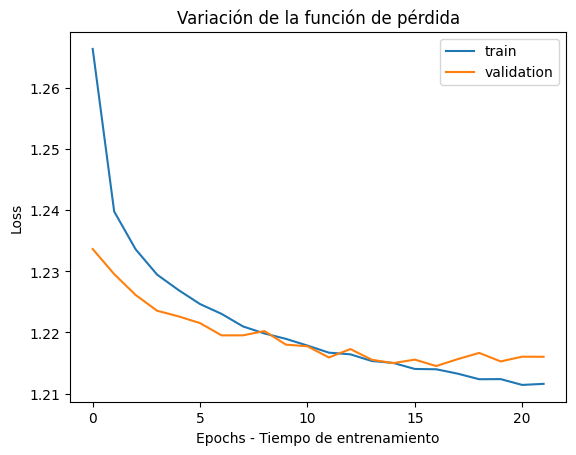

In [79]:
# Visualización de las curvas de error

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Variación de la función de pérdida')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.show()

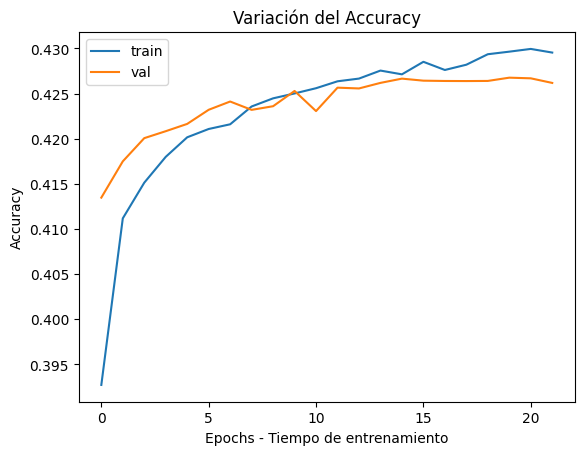

In [80]:
# Visualización de las curvas de Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Variación del Accuracy')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

In [82]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [83]:
# Libreria para la optimización de hiperparámetros
from keras_tuner.tuners import RandomSearch

In [88]:
# Definición de Hyper Model: Modelo para Tunear

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Especifica la forma de entrada (columnas o variables)

    # Definciónde la primera capa oculta con ajuste de hiperparámetros:
    hp_activation_1 = hp.Choice('activation_1', values=['relu', 'tanh'])
    model.add(keras.layers.Dense(units=256, activation=hp_activation_1))

    # Definición de la capa de dropout con ajuster de hiperparámetro: droupout_rate
    hp_dropout_rate1 = hp.Float('dropout_rate_1', min_value= 0.1, max_value= 0.5, step=0.1)
    model.add(keras.layers.Dropout(hp_dropout_rate1))

    # Definición de la segunda capa oculta con optimización de hiperparámetros
    hp_activation_2 = hp.Choice('activation_2', values=['relu', 'tanh'])
    model.add(keras.layers.Dense(units=128, activation=hp_activation_2))

    # Definición de la capa de dropout con ajuster de hiperparámetro: droupout_rate
    hp_dropout_rate2 = hp.Float('dropout_rate_2', min_value= 0.1, max_value= 0.5, step=0.1)
    model.add(keras.layers.Dropout(hp_dropout_rate2))

    # Definición de la tercera capa oculta con optimización de hiperparámetros: Función de activación
    hp_units_3 = hp.Int('units_3', min_value=32, max_value=128, step=32)
    hp_activation_3 = hp.Choice('activation_3', values=['relu', 'tanh'])
    model.add(keras.layers.Dense(units=hp_units_3, activation=hp_activation_3))

    # Definición de la cuarta capa oculta con optimización de hiperparámetros: Función de activación
    hp_units_4 = hp.Int('units_4', min_value=32, max_value=64, step=16)
    hp_activation_4 = hp.Choice('activation_4', values=['relu', 'tanh'])
    model.add(keras.layers.Dense(units=hp_units_4, activation=hp_activation_4))

    # Capa de salida
    model.add(keras.layers.Dense(4, activation='softmax'))

    #Nuevamente, se define primero el hiperparametro y luego
    # Definición del compilador con optimización del hiperparámetro lr
    hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
        )

    return model

In [92]:
# Para porder ejecutar la búsqueda aleatoria tenemos que definir el tuner random search

# Definir/inicializar el Tuner

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=2,
    directory= 'Results_tuner', # Donde se van a guardar los resultados de la búsqueda
    project_name = 'Prebas_saber_Pro'
)

In [93]:
# Ejecución del Tuner
tuner.search(X_train, y_train_one_hot, epochs=5, validation_data=(X_test, y_test_one_hot))

Trial 3 Complete [00h 13m 27s]
val_accuracy: 0.4189867675304413

Best val_accuracy So Far: 0.4189867675304413
Total elapsed time: 00h 38m 12s


In [94]:
# Mostrar el mejor modelo obtenido en la búsqueda
for h_param in [f"units_{i}" for i in range(3, 5)] + [f"activation_{i}" for i in range(1, 5)] + ['learning_rate']:
    print(f"{h_param}: {tuner.get_best_hyperparameters()[0].get(h_param)}")

units_3: 128
units_4: 64
activation_1: tanh
activation_2: tanh
activation_3: relu
activation_4: relu
learning_rate: 0.001


In [95]:
# Almacenar el mejor modelo
best_model = tuner.get_best_models()[0]

# Definir la arqutectura del modelo según los hiperparámetros óptimos
best_model.build(input_shape=(X_train.shape[1]))

# Resumen de la arquitectura del modelo
best_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,124 (301.27 KB)

 Trainable params: 77,124 (301.27 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
## Ajuste de la red neuronal con hiperparámetros óptimos
history2 = best_model.fit(X_train, y_train_one_hot, epochs=15, validation_data=(X_test, y_test_one_hot))

# Cuál es la epoch con max val_accuracy
val_accuracy_per_epoch = history2.history['val_accuracy']
best_epoch = val_accuracy_per_epoch.index(max(val_accuracy_per_epoch))+1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/15
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - accuracy: 0.4271 - loss: 1.2130 - val_accuracy: 0.4226 - val_loss: 1.2172
Epoch 2/15
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 86s 4ms/step - accuracy: 0.4285 - loss: 1.2124 - val_accuracy: 0.4242 - val_loss: 1.2178
Epoch 3/15
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 67s 4ms/step - accuracy: 0.4297 - loss: 1.2104 - val_accuracy: 0.4235 - val_loss: 1.2189
Epoch 4/15
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 74s 4ms/step - accuracy: 0.4292 - loss: 1.2109 - val_accuracy: 0.4229 - val_loss: 1.2165
Epoch 5/15
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 0.4287 - loss: 1.2112 - val_accuracy: 0.4242 - val_loss: 1.2160
Epoch 6/15
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.4296 - loss: 1.2100 - val_accuracy: 0.4245 - val_loss: 1.2160
Epoch 7/15
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 0.4293 - loss: 1.2088 - val_accuracy: 0.4238 - val_loss: 1.2170
Epoch 8/15
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 55s 4ms/step - accuracy: 

> Con base en lo anterior, el mejor modelo fue el realizado con ajuste manual, dado que obtuvo un mayor accuracy, por lo tanto ann1 es el modelo elegido para enviar a Kaggle, se procede a preprocesar el cojunto de test, para realizar las predicciones y posterior envío

# <font color=4CBB17>**Enviar a KAGGLE**</font>


In [99]:
### Se cargan los datos de test para aplicar el preprocesamineto anterior
zt = pd.read_csv("test.csv")
zt.head(3)

,Unnamed: 0,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Primaria completa,Si
1,1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No
2,2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,No


In [100]:
zt['ESTU_PRGM_DEPARTAMENTO'].value_counts()

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,120714
ANTIOQUIA,35900
VALLE,19183
ATLANTICO,17696
SANTANDER,12198
NORTE SANTANDER,9606
BOLIVAR,8779
CUNDINAMARCA,6017
BOYACA,6017


In [101]:
zt_ids = zt['ID'].values

In [102]:
zt = zt.drop(zt.columns[[0, 1]], axis=1)
zt.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Primaria completa,Si
1,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No
2,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,No
3,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Primaria incompleta,No
4,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No


In [103]:
# Se crea una nueva columna llamada AÑO ya que hay unas categorias muy grandes y las otras demasiado pequeñas
zt['PERIODO'] = zt['PERIODO'].astype(str)
zt['AÑO'] = ['2018' if i in ['20183', '20184']
              else '2019' if i in ['20195', '20194', '20196']
              else '2020' if i in ['20203', '20202']
              else '2021' if i in ['20212', '20213']
              else i for i in zt['PERIODO']]

In [104]:
zt.AÑO.value_counts()

,count
AÑO,
2019,78246
2020,74108
2021,73907
2018,70525


In [105]:
# Asignar a los valores nulos "No info" para variables categoricas educación de la madre y padre
zt.FAMI_EDUCACIONMADRE.values[zt.FAMI_EDUCACIONMADRE.isna()] = 'No info'
zt.FAMI_EDUCACIONPADRE.values[zt.FAMI_EDUCACIONPADRE.isna()] = 'No info'

In [106]:
# Se reeemplazan las categorias 'No sabe', 'No Aplica', 'No info' en una nueva llamada indeterminado
zt['FAMI_EDUCACIONMADRE'] = ['Indeterminado' if i in ['No sabe', 'No Aplica', 'No info'] else i for i in zt['FAMI_EDUCACIONMADRE'].values]
zt['FAMI_EDUCACIONPADRE'] = ['Indeterminado' if i in ['No sabe', 'No Aplica', 'No info'] else i for i in zt['FAMI_EDUCACIONPADRE'].values]

In [107]:
# Asignar a los valores nulos "No info" en la variable del Valor matricula Universidad
zt.ESTU_VALORMATRICULAUNIVERSIDAD.values[zt.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'No info'

In [108]:
# Se asigna el promedio de pago de matricula para cada categoria dentro de la variable

cmap = {'Entre 1 millón y menos de 2.5 millones': 1.75,
    'Entre 2.5 millones y menos de 4 millones': 3.25,
    'Menos de 500 mil': .250,
    'Entre 500 mil y menos de 1 millón': .75,
    'Entre 4 millones y menos de 5.5 millones': 4.75,
    'Más de 7 millones': 7.75,
    'Entre 5.5 millones y menos de 7 millones': 6.25,
    'No pagó matrícula': 0,
    'No info': -1}

# Usar map para transformar los valores
zt['ESTU_VALORMATRICULAUNIVERSIDAD'] = zt['ESTU_VALORMATRICULAUNIVERSIDAD'].map(cmap)

# Contar los valores únicos
zt['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,86923
3.25,55193
0.25,34589
0.75,33564
4.75,29855
7.75,29061
6.25,16558
0.00,8320
-1.00,2723


In [109]:
counts = zt['ESTU_PRGM_DEPARTAMENTO'].value_counts()

umbral = 1000
categorias_a_mantener = counts[counts > umbral].index

# Agrupar las categorías menos frecuentes como "Otros"
zt['ESTU_PRGM_DEPARTAMENTO'] = zt['ESTU_PRGM_DEPARTAMENTO'].apply(lambda x: x if x in categorias_a_mantener else 'Zonas dificil acceso')


In [110]:
## Asignar a los valores nulos "No info" para variable de horas que trabaja el estudiante a la semana
zt.ESTU_HORASSEMANATRABAJA.values[zt.ESTU_HORASSEMANATRABAJA.isna()] = 'No info'
sum(zt.ESTU_HORASSEMANATRABAJA.isna())

0

In [111]:
# Se asigna el promedio de horas para cada categoria dentro de la variable

emap = {'0': 0,
    'Menos de 10 horas': 5,
    'Entre 11 y 20 horas': 15.5,
    'Entre 21 y 30 horas': 25.5,
    'Más de 30 horas': 35.5,
    'No info': -1}

# Usar map para transformar los valores
zt['ESTU_HORASSEMANATRABAJA'] = zt['ESTU_HORASSEMANATRABAJA'].map(emap)

# Contar los valores únicos
zt['ESTU_HORASSEMANATRABAJA'].value_counts()

,count
ESTU_HORASSEMANATRABAJA,
35.5,106189
0.0,50422
15.5,49386
25.5,39931
5.0,37479
-1.0,13379


In [112]:
zt.FAMI_ESTRATOVIVIENDA.values[zt.FAMI_ESTRATOVIVIENDA.isna()] = 'No info'
sum(zt.FAMI_ESTRATOVIVIENDA.isna())

0

In [114]:
# Mapeo de carreras
categoria_map = {
    'Ingeniería Industrial': ['INGENIERIA INDUSTRIAL', 'INGENIERÍA INDUSTRIAL'],
    'Otras Ingenierías': ['INGENIERIA', 'INGENIERÍA', 'INGE'],
    'Licenciaturas': ['LICENCIATURA',],
    'Exactas': ['QUIMICA', 'ESTAD', 'BIOLOG', 'ANTRO', 'MATEMATICAS', 'FISICA', 'GEOLO'],
    'Lenguas':['INGLES', 'LITER', 'LENGUA', 'IDIOMA'],
    'Ciencias Economicas':['CONTADURÍA', 'CONTADURIA', 'ECONOM','FINAN'],
    'Administracion de empresas': ['ADMINISTRACION DE EMPRESAS', 'ADMINISTRACIÓN DE EMPRESAS', 'ADMINISTRACION DE NEGOCIOS INTERNACIONALES'],
    'Otras Admin':  ['ADMINISTRACION', 'ADMINISTRACIÓN'],
    'Animales': ['ZOOTECNIA', 'VETERINARIA'],
    'Salud': ['ENFERM', 'ODONTO','SALUD', 'QUIR', 'FISIO', 'NUTRI', 'FONOAUDIO' ],
    'Ciencias Sociales': ['PSICO', 'COMUNICA','SOCIAL','PERIO','HIST', 'SOCIO', 'FILOSO', 'TEOLO'],
    'Negocios': ['NEGOCIOS', 'MERCADEO', 'MARKETING', 'PUBLICIDAD', 'INTERNAC'],
    'Derecho': ['DERECHO'],
    'Ciencias Politicas':['CIENCIA POLITICA', 'POLITICA','POLÍTICA', 'JURISPRUDENCIA'],
    'Medicina':['MEDICINA'],
    'Arquitectura y Diseño':['ARQUITECTURA', 'DISEÑO'],
    'Entretenimiento':['ARTE', 'ARTES', 'MUSICA','MÚSICA' 'CINE', 'TV','TEATRO']
}

# Clasificación de las carreras usando apply y búsqueda de key words
zt['PRGM_AREA'] = zt['ESTU_PRGM_ACADEMICO'].apply(lambda carrera:
    next((categoria for categoria, keywords in categoria_map.items()
          if any(keyword in carrera.upper() for keyword in keywords)),
         'Otras'))

In [115]:
## Asignar a los valores nulos "No info" para variable de estrato
zt.FAMI_TIENEINTERNET.values[zt.FAMI_TIENEINTERNET.isna()] = 'No info'

In [116]:
# Mapeo de valores
map = {
    'Si': 1,
    'No': 0,
    'No info': -1
}

# Aplicar el mapeo a la columna
zt['FAMI_TIENEINTERNET'] = zt['FAMI_TIENEINTERNET'].map(map)

In [117]:
## Asignar a los valores nulos "No info" para variable de estrato
zt.ESTU_PAGOMATRICULAPROPIO.values[zt.ESTU_PAGOMATRICULAPROPIO.isna()] = 'No info'

In [118]:
# Mapeo de valores
mapping = {
    'Si': 1,
    'No': 0,
    'No info': -1
}

# Aplicar el mapeo a la columna
zt['ESTU_PAGOMATRICULAPROPIO'] = zt['ESTU_PAGOMATRICULAPROPIO'].map(mapping)


In [119]:
# Se elimina variable respuesta y dos variables categoricas que no se van a usar en el modelo
X_features2 = zt.drop(['PERIODO', 'ESTU_PRGM_ACADEMICO'], axis=1, inplace=False)

In [120]:
# Estrato es categorica ordinal (ya que se puede establecer un orden), por lo tanto se le asigna dicho orden
dic = {'No info':-1, 'Sin Estrato':0, 'Estrato 1':1, 'Estrato 2':2,  'Estrato 3':3,  'Estrato 4':4, 'Estrato 5':5, 'Estrato 6':6}
X_features2['FAMI_ESTRATOVIVIENDA'] = X_features2['FAMI_ESTRATOVIVIENDA'].replace(dic).infer_objects()

<ipython-input-120-9adf7fe1c02a>:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [121]:
X_features2['FAMI_ESTRATOVIVIENDA'] = X_features2['FAMI_ESTRATOVIVIENDA'].astype('int')

In [122]:
columnas_a_transformar = ['FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE', 'AÑO','PRGM_AREA', 'ESTU_PRGM_DEPARTAMENTO']
columnas_a_escalar = ['FAMI_TIENEINTERNET','ESTU_PAGOMATRICULAPROPIO','ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA']

In [123]:
# Dumización de variables independientes de más de 2 categorias
columnas_a_transformar2=pd.get_dummies(X_features2[columnas_a_transformar])

In [124]:
from sklearn.preprocessing import StandardScaler

X_features2[columnas_a_escalar] = StandardScaler().fit_transform(X_features2[columnas_a_escalar])

In [125]:
# Seleccionar las columnas no transformadas
escaladas2 = X_features2.drop(columns= ['FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','AÑO','PRGM_AREA', 'ESTU_PRGM_DEPARTAMENTO'])

# Concatenar las columnas transformadas y las no transformadas
X_features_final2 = pd.concat([escaladas2, columnas_a_transformar2], axis=1)

X_features_final2

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,FAMI_EDUCACIONPADRE_Educación profesional completa,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Indeterminado,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Indeterminado,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,AÑO_2018,AÑO_2019,AÑO_2020,AÑO_2021,PRGM_AREA_Administracion de empresas,PRGM_AREA_Animales,PRGM_AREA_Arquitectura y Diseño,PRGM_AREA_Ciencias Economicas,PRGM_AREA_Ciencias Politicas,PRGM_AREA_Ciencias Sociales,PRGM_AREA_Derecho,PRGM_AREA_Entretenimiento,PRGM_AREA_Exactas,PRGM_AREA_Ingeniería Industrial,PRGM_AREA_Lenguas,PRGM_AREA_Licenciaturas,PRGM_AREA_Medicina,PRGM_AREA_Negocios,PRGM_AREA_Otras,PRGM_AREA_Otras Admin,PRGM_AREA_Otras Ingenierías,PRGM_AREA_Salud,ESTU_PRGM_DEPARTAMENTO_ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO_ATLANTICO,ESTU_PRGM_DEPARTAMENTO_BOGOTÁ,ESTU_PRGM_DEPARTAMENTO_BOLIVAR,ESTU_PRGM_DEPARTAMENTO_BOYACA,ESTU_PRGM_DEPARTAMENTO_CALDAS,ESTU_PRGM_DEPARTAMENTO_CAQUETA,ESTU_PRGM_DEPARTAMENTO_CAUCA,ESTU_PRGM_DEPARTAMENTO_CESAR,ESTU_PRGM_DEPARTAMENTO_CHOCO,ESTU_PRGM_DEPARTAMENTO_CORDOBA,ESTU_PRGM_DEPARTAMENTO_CUNDINAMARCA,ESTU_PRGM_DEPARTAMENTO_HUILA,ESTU_PRGM_DEPARTAMENTO_LA GUAJIRA,ESTU_PRGM_DEPARTAMENTO_MAGDALENA,ESTU_PRGM_DEPARTAMENTO_META,ESTU_PRGM_DEPARTAMENTO_NARIÑO,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_Zonas dificil acceso
0,-1.101251,-0.988654,0.484215,0.383540,1.111708,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.190736,0.428821,-0.270714,0.383540,-0.835032,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,-0.455258,-1.334380,0.484215,0.383540,-0.835032,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,-0.455258,0.428821,-1.025643,-1.714697,-0.835032,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,

In [126]:
#Se obtienen las predicciones
preds_test_data = ann1.predict(X_features_final2)

9275/9275 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


In [127]:
print(preds_test_data.shape)

(296786, 4)


In [128]:
# Como la red, su resultado es un array con argmax se obtiene el indice con el valor maximo
preds_test_data = preds_test_data.argmax(axis=1)

In [129]:
preds_test_data

array([3, 2, 3, ..., 2, 3, 3])

In [130]:
print(preds_test_data.shape)

(296786,)


# <font color=4CBB17>**Preparar el envio a KAGGLE**</font>



In [131]:
# Reversar el mapping
rmapi = {v:k for k,v in rmap.items()}
text_preds_test_data = [rmapi[i] for i in preds_test_data]


In [132]:
# Crear el df
submission = pd.DataFrame([zt_ids, text_preds_test_data], index=['ID', 'RENDIMIENTO_GLOBAL']).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,alto
1,98545,medio-alto
2,499179,alto
3,782980,bajo
4,785185,bajo
...,...,...
296781,496981,medio-bajo
296782,209415,medio-bajo
296783,239074,medio-alto
296784,963852,alto


In [133]:
# Guardar el archivo
submission.to_csv("my_submission.csv", index=False)

In [134]:
!head my_submission.csv

ID,RENDIMIENTO_GLOBAL
550236,alto
98545,medio-alto
499179,alto
782980,bajo
785185,bajo
58495,bajo
705444,alto
557548,alto
519909,bajo


In [135]:
submission.shape

(296786, 2)

In [136]:
!kaggle competitions submit -c udea-ai4eng-20242 -f my_submission.csv -m "mateo toro final submission with neural network "

100% 4.11M/4.11M [00:00<00:00, 5.94MB/s]
Successfully submitted to UDEA/ai4eng 20242 - Pruebas Saber Pro Colombia